## Voglio cercare di determinare la distribuzione dei miei dati generati

In [21]:
import numpy as np

def asSpherical(xyz):
    # Converts unit vectors [x,y,z] to spherical angles [theta, phi] in degrees
    sph = []
    for x, y, z in xyz:
        theta = np.arccos(z) * 180 / np.pi         # z = cos(theta)
        phi = np.arctan2(y, x) * 180 / np.pi       # atan2 handles full circle
        sph.append([theta, phi])
    return sph

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = "C:\\Users\\lcdit\\OneDrive\\Desktop\\Uni\\Triennale\\Tesi\\data\\directions_tracks.csv"

direction = pd.read_csv(path).values
sph = np.vstack(asSpherical(direction))
a = np.sort(sph[:,1])
phi = []
for i in a:
    if i>0:
        phi.append(i)
    else:
        phi.append(360+i)
phi = np.sort(phi)
theta = np.sort(sph[:,0])

In [28]:
min(theta)

np.float64(94.80593686888115)

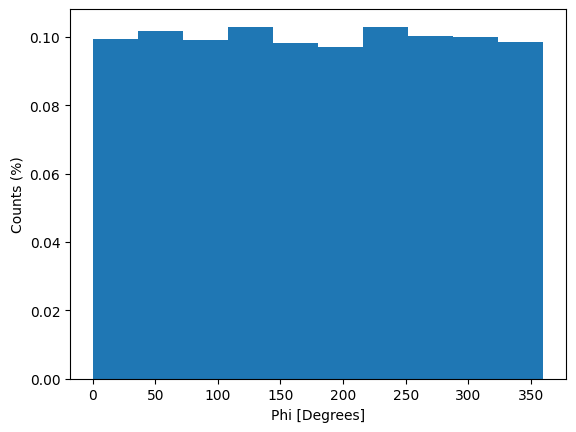

In [26]:
counts, bins = np.histogram(phi)
#plt.stairs(counts/np.sum(counts), bins,)
plt.hist(bins[:-1], bins, weights=counts/np.sum(counts))
plt.ylabel("Counts (%)")
plt.xlabel("Phi [Degrees]")
plt.show()

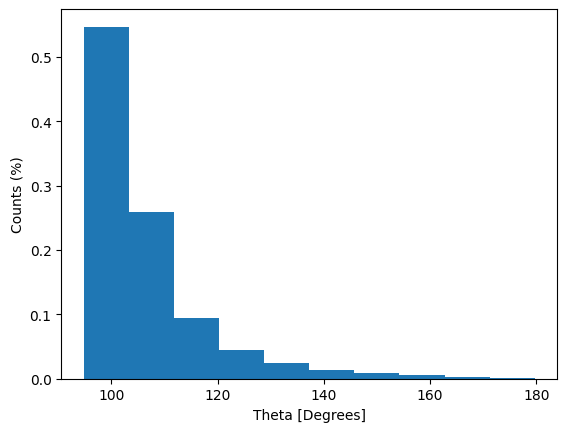

In [27]:
counts, bins = np.histogram(theta)
plt.ylabel("Counts (%)")
plt.xlabel("Theta [Degrees]")

plt.hist(bins[:-1], bins, weights=counts/np.sum(counts))
#plt.grid()
plt.show()

## Ora cerchiamo di valutare quante tracce ho ricostruito

### Metodo 1:

In [ ]:
import pandas as pd
import numpy as np

names = [f"/home/luca/Uni/VI/Tesi/prog_tesi/Met_1/reconstructed_tracks_{i}_no_NaN.csv" for i in range(1,11)]
ricostruiti = []

for idx,name in enumerate(names):
    df = pd.read_csv(name, on_bad_lines='skip')
    df = df.dropna()
    df = df[(df.iloc[:,1].values==1)]

    unique_counts = df.groupby(df.columns[0])[df.columns[2]].nunique().sum()

    ricostruiti.append(unique_counts/((idx+1)*10000))
print(ricostruiti)

FileNotFoundError: [Errno 2] No such file or directory: '/home/luca/Uni/VI/Tesi/prog_tesi/Met_1/reconstructed_tracks_1_no_NaN.csv'

In [18]:
pd.DataFrame(ricostruiti,range(1,11)).to_csv('/home/luca/Uni/VI/Tesi/prog_tesi/Met_1/lin_rec_res.csv',header=False)

In [25]:
data.values

array([[ 1.        ,  0.8666    ],
       [ 2.        ,  0.74345   ],
       [ 3.        ,  0.66356667],
       [ 4.        ,  0.6032    ],
       [ 5.        ,  0.57544   ],
       [ 6.        ,  0.55418333],
       [ 7.        ,  0.53347143],
       [ 8.        ,  0.5222    ],
       [ 9.        ,  0.51801111],
       [10.        ,  0.51723   ]])

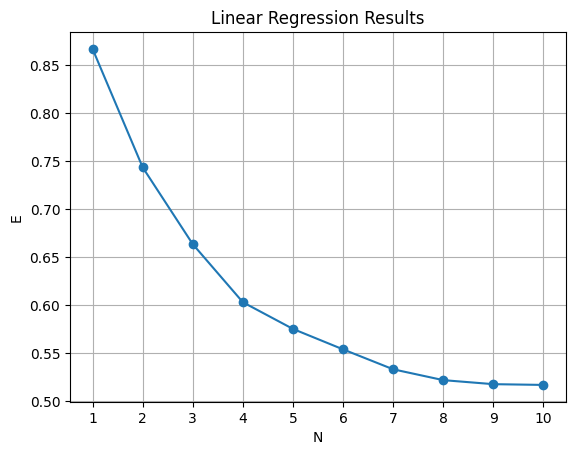

In [26]:
from matplotlib import pyplot as plt
data = pd.read_csv('/home/luca/Uni/VI/Tesi/prog_tesi/Met_1/lin_rec_res.csv',  header= None)
x = [i for i in range(1, 11)]
y = data.values[:,1]
plt.plot(x, y, marker='o')
plt.xlabel("N") #Number of simultaneous hits
plt.ylabel("E") #Efficiency $E = N_{rec}/N_{sim}$
plt.title("Linear Regression Results")
plt.grid(True)
plt.xticks(x)
plt.show()

In [2]:
import pandas as pd
import numpy as np

names = [f"C:\\Users\\lcdit\\OneDrive\\Desktop\\Uni\\Triennale\\Tesi\\Met_2\\reco_{i}_10k" for i in range(1,11)]
ricostruiti = []

for name in names:
    df = pd.read_csv(name)

    # Filtra via le righe con '-1' in event_trk_nr
    df = df[(df['trk_nr'].values!=-1)]

    # Conta quante combinazioni uniche di event_trk_nr per gruppo
    unique_counts = df.groupby(["event", "trk_nr"])["event_trk_nr"].nunique()

    # Un gruppo valido se ha 1 sola stringa ripetuta e nessun -1
    valid = (unique_counts == 1)

    rico = valid.sum()
    ricostruiti.append(rico)

In [8]:
print(ricostruiti/(10000*np.array(range(1,11)) ))

[0.9161     0.72605    0.7804     0.7987     0.80288    0.80676667
 0.78712857 0.4818875  0.12504444 0.01856   ]


In [4]:
import csv
with open('/home/luca/Uni/VI/Tesi/prog_tesi/Met_2/hough_res.csv', mode='a', newline='') as file:
                writer = csv.writer(file)
                writer.writerow( list(ricostruiti/(10000*np.array([1,2,3,4,5]) )) )

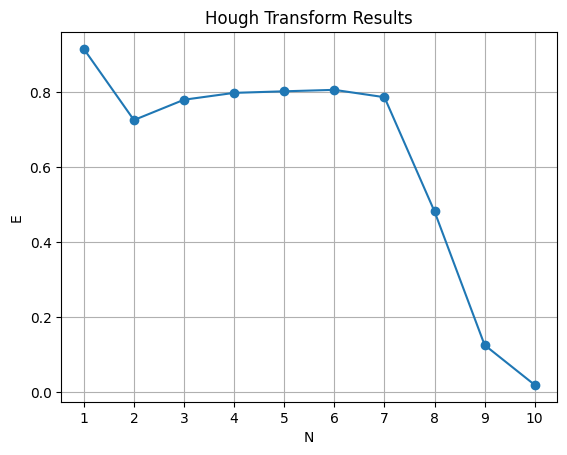

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = [i for i in range(1, 11)]
y = ricostruiti/(10000*np.array(range(1,11)) )
plt.plot(x, y, marker='o')
plt.xlabel("N") #Number of simultaneous hits
plt.ylabel("E") #Efficiency $E = N_{rec}/N_{sim}$
plt.title("Hough Transform Results")
plt.grid(True)
plt.xticks(x)
plt.show()
